<a href="https://colab.research.google.com/github/qri0usmind/crop_price_predictor/blob/main/t%2B1_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib as plt

# Load dataset
df = pd.read_csv("rice_model_ready_top_8_with_season.csv")
df['date'] = pd.to_datetime(df['date'])

# Shift target to predict next day's price (t+1)
df['target'] = df['rice_price_per_kg'].shift(-1)
df = pd.get_dummies(df, columns=['season'])  # one-hot encode season

# Drop last row (NaN target)
df = df.dropna()

# Define features and target
X = df.drop(columns=['date', 'rice_price_per_kg', 'target'])
y = df['target']

# 90/10 time-based split
split_idx = int(len(X) * 0.9)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Train Ridge with cross-validation
ridge = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# Evaluate
print("✅ Ridge Regression (Forecasting)")
print("Best Alpha:", ridge.alpha_)
print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE:", round(mean_squared_error(y_test, y_pred), 2))
print("R²:", round(r2_score(y_test, y_pred), 4))


✅ Ridge Regression (Forecasting)
Best Alpha: 10.0
MAE: 8.77
MSE: 161.42
R²: 0.8354


/tmp/ipython-input-3775977298.py:12: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


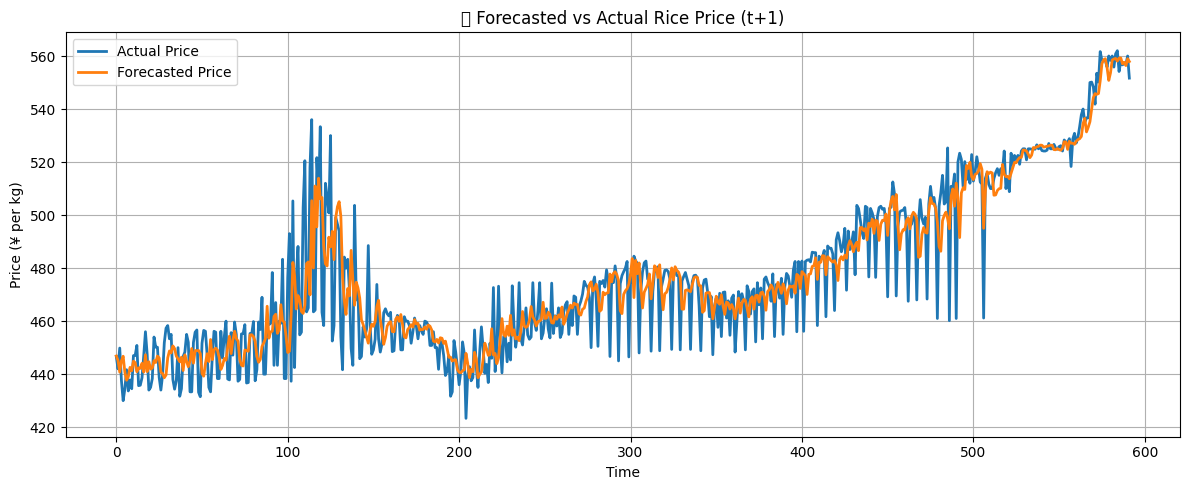

In [ ]:
import matplotlib.pyplot as plt

# Forecasting Visualization
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label="Actual Price", linewidth=2)
plt.plot(y_pred, label="Forecasted Price", linewidth=2)
plt.title("📉 Forecasted vs Actual Rice Price (t+1)")
plt.xlabel("Time")
plt.ylabel("Price (¥ per kg)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
